In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

#from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import svm

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
import time
from sklearn import metrics
import numpy as np
import process as p


In [11]:
import matplotlib.pyplot as plt

def getmyData(filepath):
  l = p.getData(filepath)
  l = l[1:10000]
  np.random.shuffle(l)
  lgt = len(l)
  ltrain = l[:int(lgt * 0.8)]
  ltest = l[int(lgt * 0.8):]
  Y_train = ltrain[:,0]
  Y_train = np.array([int(e) for e in Y_train])
  X_train = ltrain[:,1]
  Y_test = ltest[:,0]
  Y_test = np.array([int(e) for e in Y_test])
  X_test = ltest[:,1]
  return (X_train, Y_train,X_test,Y_test)

def autolabels(rects, ax, time = False):
    for rect in rects:
        height = rect.get_height()
        if (time):
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    '%f' % float(height) + "s",
                  ha='center', va='bottom')
        else:
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    '%d' % int(height * 100) + "%",
                  ha='center', va='bottom')
from pylab import rcParams
def plot_result(clfs, results):
    N = len(clfs)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.18    # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind , results[:,0], width, color='g')
    rects2 = ax.bar(ind - width, results[:,1], width, color='r')
    rects3 = ax.bar(ind + width, results[:,2], width, color='b')
    rects4 = ax.bar(ind + 2 * width, results[:,3], width, color='y')
# add some text for labels, title and axes ticks
    ax.set_ylim(0,1.4)
    ax.set_ylabel('Pourcentage %')
    ax.set_title("Benchmark")
    ax.set_xticks(ind )
    ax.set_xticks(ind )
    labels = [clfs[i][1] for i in range(N)]
    ax.set_xticklabels(labels, rotation = 'vertical')
    ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('precision', 'recall', 'accuracy','F1 score'))
    
    autolabels(rects1, ax)
    autolabels(rects2, ax)
    autolabels(rects3, ax)
    autolabels(rects4, ax)
    #rcParams['figure.figsize'] = (15,15)

    plt.show()    
    


def plot_time_exec(clfs, time_exec):
    N = len(clfs)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.6    # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind , time_exec, width, color='b')
# add some text for labels, title and axes ticks
    ax.set_ylim(0,time_exec.max() * 1.2)
    ax.set_ylabel('time in s')
    ax.set_title("Benchmark time")
    ax.set_xticks(ind )
    ax.set_xticks(ind )
    labels = [clfs[i][1] for i in range(N)]
    ax.set_xticklabels(labels, rotation = 'vertical')
   # ax.legend(rects1[0], 'time in s')
    autolabels(rects1, ax, time = True)
   # rcParams['figure.figsize'] = (15,15)
    plt.show()


def classify(clf, data_train, train_labels, data_test, test_labels, ngrams = (1,1), binn = False, idf = True, sparse = True):
  t0 = time.time()
  if (binn == True):
    idf = False
  vec = TfidfVectorizer(use_idf = idf, binary = binn, ngram_range = ngrams )
  X_train_tfidf = vec.fit_transform(data_train) 
  X_test_tfidf =  vec.transform(data_test)
  if (not(sparse)):
      X_train_tfidf = X_train_tfidf.toarray()
      X_test_tfidf =  X_test_tfidf.toarray()
  clf.fit(X_train_tfidf,train_labels)
  predicted = clf.predict(X_test_tfidf)
  
  #print(pred)
  #print(test_labels)
  
  acc = metrics.accuracy_score(test_labels, predicted)
  recall = metrics.recall_score(test_labels, predicted)
  pre = metrics.precision_score(test_labels, predicted)
  F1 = 2 * (pre * recall) / (pre + recall)
  dur = time.time() - t0
  return (pre, recall, acc, F1, dur)


    
  

In [9]:
def bench():
    #clf = (GaussianNB(), "Naive Bayes")
    
    clfs = [(GaussianNB(), "Naive Bayes"),
        (LinearSVC(random_state=0), 'SVM'),
        (LogisticRegression(), 'Max Entropy'),
        (MultinomialNB(alpha=.01), "Multinomial NB"),
        (BernoulliNB(alpha=.01), "BernoulliNB"),
        (RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier"),
        (Perceptron(max_iter=50), "Perceptron"), 
        (PassiveAggressiveClassifier(max_iter=50), "Passive-Aggressive"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (RandomForestClassifier(n_estimators=100), "Random forest")]
    results = []
    filepath = 'file2.csv'
    X_tr,Y_tr,X_te,Y_te = getmyData(filepath)
    for clf, name in clfs[:3]:
        if (name == 'Naive Bayes'):
            results.append(classify(clf, X_tr, Y_tr, X_te, Y_te, binn = False, sparse = False))
        else : 
            results.append(classify(clf, X_tr, Y_tr, X_te, Y_te, binn = False))
    
    results = np.array(results)
    plot_result(clfs[:3], results)
    plot_time_exec(clfs[:3], results[:,4])

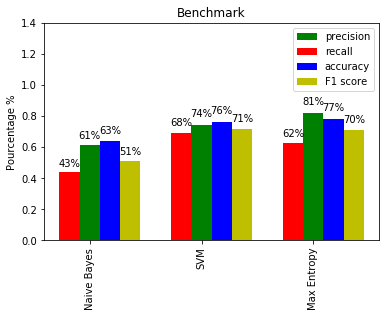

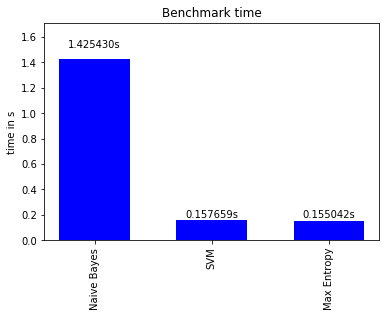

In [12]:
bench()

In [11]:
bench

<function __main__.bench>